<a href="https://colab.research.google.com/github/sahiljaura/project_clg/blob/main/Stress_Detection_In_And_Through_Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classification with PyCaret**

A machine learning classification problem known as "multiclass classification" which has more than two classes or outputs. The aim of multiclass classification is to predict class among other classes with higher accuracy.  

**Install Pycaret**

In [1]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 9.5 MB/s 
     |████████████████████████████████| 1.7 MB 45.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 55.9 MB/s 
     |████████████████████████████████| 167 kB 64.2 MB/s 
     |████████████████████████████████| 5.0 MB 60.3 MB/s 
     |████████████████████████████████| 662 kB 46.8 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 141 kB 57.1 MB/s 
     |████████████████████████████████| 2.0 MB 53.2 MB/s 
     |████████████████████████████████| 25.8 MB 50.7 MB/s 
     |████████████████████████████████| 325 kB 30.1 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 

**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Version of the Pandas and Seaborn Library** 

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In this dataset human stress level in and through sleep is categorized into 5 different stress levels: (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high). A total of 630 observations were taken into account. The data has been gathered from Literature Review (No human subjects were considered).This dataset is generated by the member of IEEE.

The data set can be used for the tasks of classification and cluster analysis.

Attribute Information:


To construct the data, Eight different parameters or features of health were recorded:

1.Snoring range of the user(SR) 

2.Respiration rate(RR) 

3.Body temperature(T) 

4.Limb movement rate(LM) 

5.Blood oxygen levels(BO) 

6.Eye movement(EM) 

7.Number of hours of sleep(SR.1) 

8.Heart rate(HR)


Dataset is taken from: https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sahiljaura/project_clg/main/SaYoPillow.csv')
df.head(25)

SR      RR       T      LM      BO      EM   SR.1     HR  SL
0   93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3
1   91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3
2   60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1
3   85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3
4   48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0
5   56.880  19.376  95.376   9.376  94.064   83.44  6.376  58.44   1
6   47.000  16.800  97.200   5.600  95.800   68.00  7.800  52.00   0
7   50.000  18.000  99.000   8.000  97.000   80.00  9.000  55.00   0
8   45.280  16.112  96.168   4.224  95.112   61.12  7.112  50.28   0
9   55.520  19.104  95.104   9.104  93.656   82.76  6.104  57.76   1
10  73.440  21.344  93.344  11.344  91.344   91.72  4.016  63.36   2
11  59.280  19.856  95.856   9.856  94.784   84.64  6.856  59.64   1
12  48.600  17.440  98.160   6.880  96.440   74.40  8.440  53.60   0
13  96.288  26.288  85.360  17.144  82.432  100.36  0.000  75.72   4
14  87.800  24.080  91.040  14.600  89.040   97.60  1.040  70.20   3
15  52.320  18.464  94.464   8.464  92.696   81.16  5.464  56.16   1
16  52.640  18.528  94.528   8.528  92.792   81.32  5.528  56.32   1
17  86.240  23.664  90.832  14.080  88.832   97.08  0.832  69.16   3
18  81.560  22.416  90.208  12.520  88.208   95.52  0.208  66.04   3
19  63.680  20.368  92.368  10.368  90.368   86.84  2.552  60.92   2
20  77.600  21.760  93.760  11.760  91.760   93.80  4.640  64.40   2
21  77.280  21.728  93.728  11.728  91.728   93.64  4.592  64.32   2
22  69.760  20.976  92.976  10.976  90.976   89.88  3.464  62.44   2
23  88.040  24.144  91.072  14.680  89.072   97.68  1.072  70.36   3
24  89.960  24.656  91.328  15.320  89.328   98.32  1.328  71.64   3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      630 non-null    float64
 1   RR      630 non-null    float64
 2   T       630 non-null    float64
 3   LM      630 non-null    float64
 4   BO      630 non-null    float64
 5   EM      630 non-null    float64
 6   SR.1    630 non-null    float64
 7   HR      630 non-null    float64
 8   SL      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

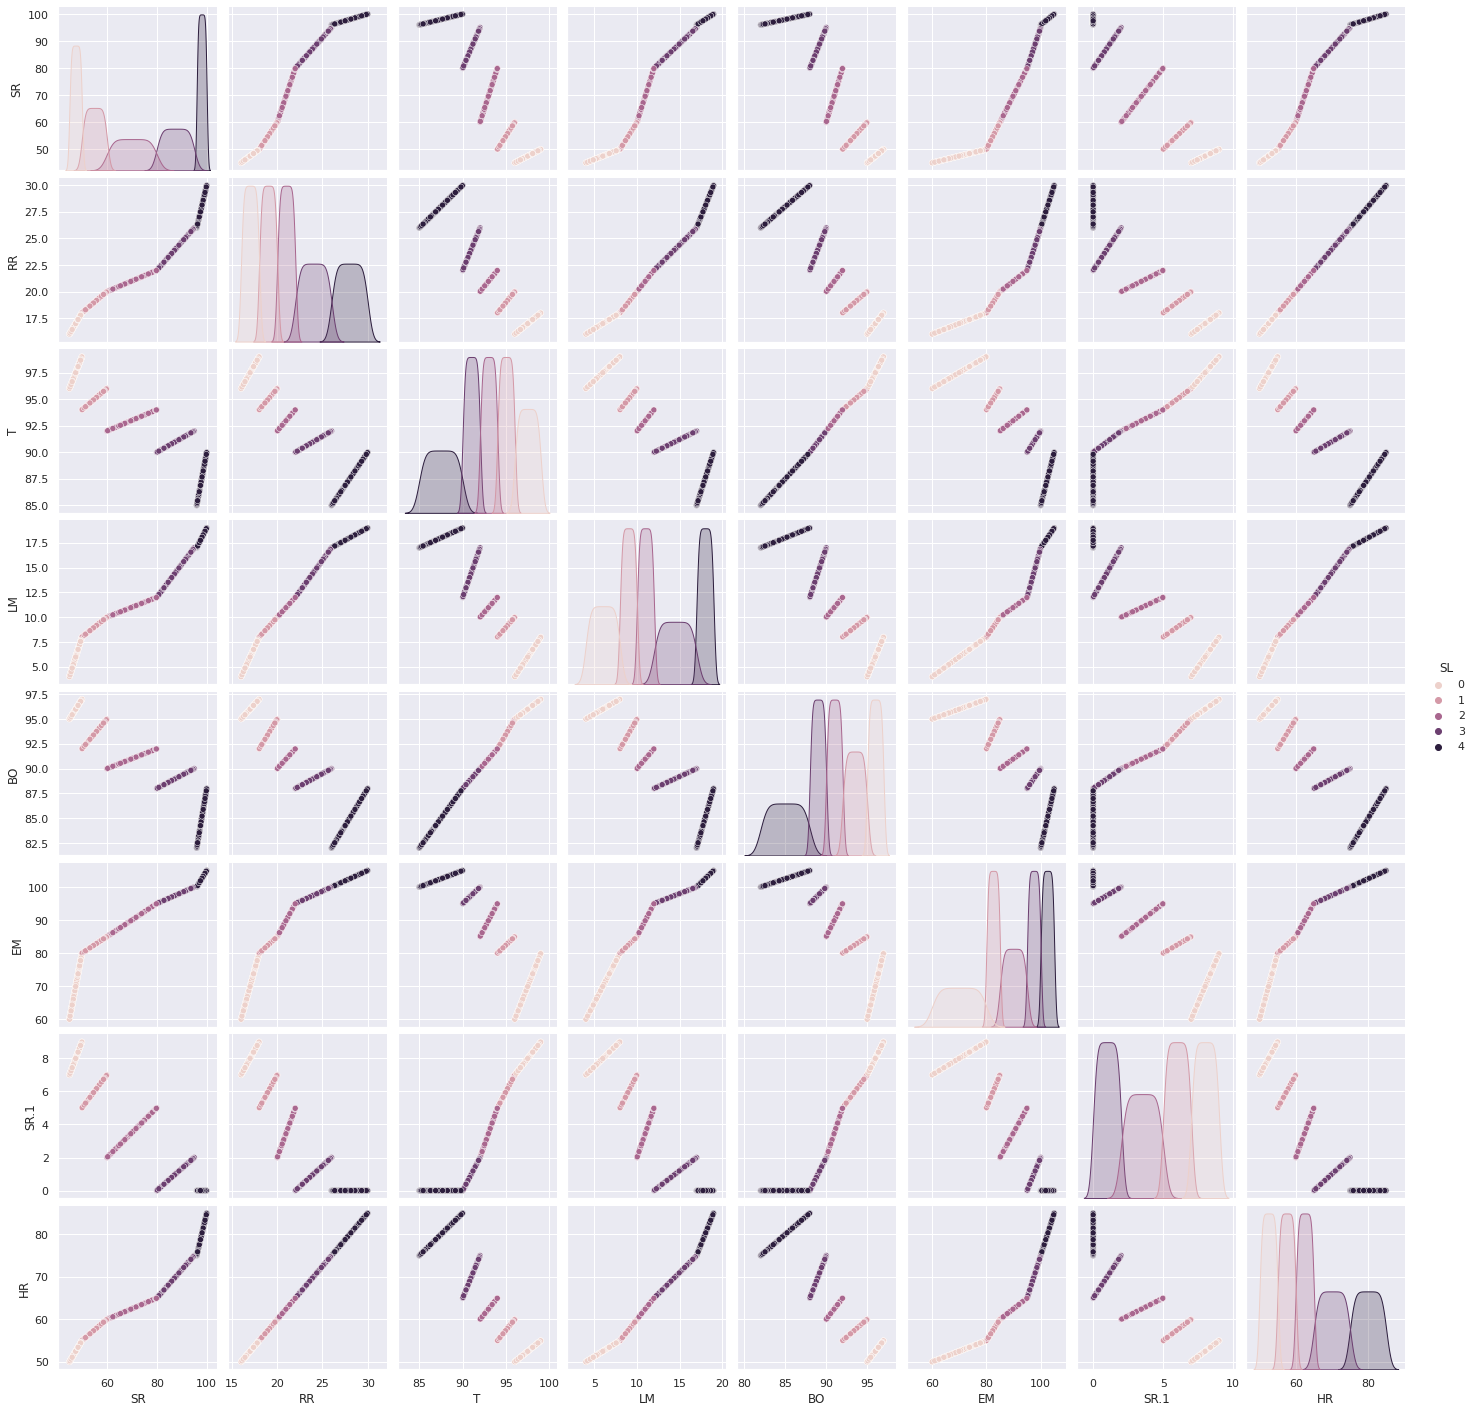

In [9]:
sns.pairplot(df, hue='SL')
plt.show()

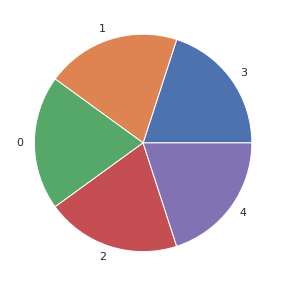

In [10]:
y = df['SL']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['SL'])
X.head(10)

SR      RR       T      LM      BO     EM   SR.1     HR
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12
5  56.88  19.376  95.376   9.376  94.064  83.44  6.376  58.44
6  47.00  16.800  97.200   5.600  95.800  68.00  7.800  52.00
7  50.00  18.000  99.000   8.000  97.000  80.00  9.000  55.00
8  45.28  16.112  96.168   4.224  95.112  61.12  7.112  50.28
9  55.52  19.104  95.104   9.104  93.656  82.76  6.104  57.76

In [12]:
X.describe().transpose()

count  mean        std   min    25%   50%    75%    max
SR    630.0  71.6  19.372833  45.0  52.50  70.0  91.25  100.0
RR    630.0  21.8   3.966111  16.0  18.50  21.0  25.00   30.0
T     630.0  92.8   3.529690  85.0  90.50  93.0  95.50   99.0
LM    630.0  11.7   4.299629   4.0   8.50  11.0  15.75   19.0
BO    630.0  90.9   3.902483  82.0  88.50  91.0  94.25   97.0
EM    630.0  88.5  11.893747  60.0  81.25  90.0  98.75  105.0
SR.1  630.0   3.7   3.054572   0.0   0.50   3.5   6.50    9.0
HR    630.0  64.5   9.915277  50.0  56.25  62.5  72.50   85.0

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

SR        RR         T        LM        BO        EM      SR.1  \
0  1.146845  0.979066 -0.272195  1.140539 -0.271838  0.934005 -0.609407   
1  1.035260  0.833720 -0.353853  0.972949 -0.345696  0.873421 -0.703767   
2 -0.599252 -0.454206  0.907316 -0.395697  1.051448 -0.294506  1.081206   
3  0.731501  0.438056 -0.576145  0.516734 -0.546753  0.708498 -0.960635   
4 -1.212970 -1.148636  1.438095 -1.211299  1.371498 -1.347997  1.490099   
5 -0.760431 -0.611664  0.730389 -0.540941  0.811410 -0.425772  0.876760   
6 -1.270828 -1.261683  1.247559 -1.419854  1.256609 -1.724964  1.343317   
7 -1.115849 -0.958879  1.757924 -0.861223  1.564349 -0.715229  1.736483   
8 -1.359683 -1.435290  0.954950 -1.740136  1.080170 -2.303879  1.117902   
9 -0.830688 -0.680299  0.653267 -0.604253  0.706778 -0.482990  0.787642   

         HR  
0  0.979066  
1  0.833720  
2 -0.454206  
3  0.438056  
4 -1.148636  
5 -0.611664  
6 -1.261683  
7 -0.958879  
8 -1.435290  
9 -0.680299

In [14]:
df.describe().transpose()

count  mean        std   min    25%   50%    75%    max
SR    630.0  71.6  19.372833  45.0  52.50  70.0  91.25  100.0
RR    630.0  21.8   3.966111  16.0  18.50  21.0  25.00   30.0
T     630.0  92.8   3.529690  85.0  90.50  93.0  95.50   99.0
LM    630.0  11.7   4.299629   4.0   8.50  11.0  15.75   19.0
BO    630.0  90.9   3.902483  82.0  88.50  91.0  94.25   97.0
EM    630.0  88.5  11.893747  60.0  81.25  90.0  98.75  105.0
SR.1  630.0   3.7   3.054572   0.0   0.50   3.5   6.50    9.0
HR    630.0  64.5   9.915277  50.0  56.25  62.5  72.50   85.0
SL    630.0   2.0   1.415337   0.0   1.00   2.0   3.00    4.0

**Observations and variables**

In [15]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Box and Whisker Plots**

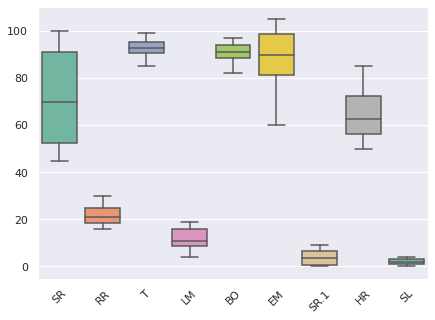

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

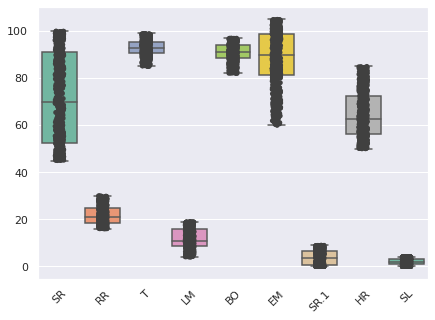

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [20]:
df.describe()

SR          RR          T          LM          BO          EM  \
count  630.000000  630.000000  630.00000  630.000000  630.000000  630.000000   
mean    71.600000   21.800000   92.80000   11.700000   90.900000   88.500000   
std     19.372833    3.966111    3.52969    4.299629    3.902483   11.893747   
min     45.000000   16.000000   85.00000    4.000000   82.000000   60.000000   
25%     52.500000   18.500000   90.50000    8.500000   88.500000   81.250000   
50%     70.000000   21.000000   93.00000   11.000000   91.000000   90.000000   
75%     91.250000   25.000000   95.50000   15.750000   94.250000   98.750000   
max    100.000000   30.000000   99.00000   19.000000   97.000000  105.000000   

             SR.1          HR          SL  
count  630.000000  630.000000  630.000000  
mean     3.700000   64.500000    2.000000  
std      3.054572    9.915277    1.415337  
min      0.000000   50.000000    0.000000  
25%      0.500000   56.250000    1.000000  
50%      3.500000   62.500000    2.000000  
75%      6.500000   72.500000    3.000000  
max      9.000000   85.000000    4.000000

**Correlation Matrix**

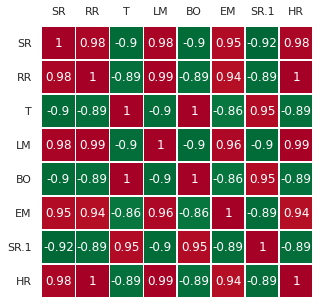

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

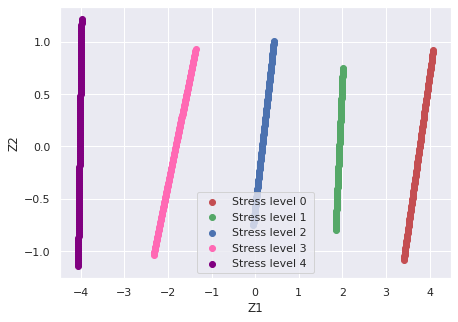

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(SL 0)->0,  2(SL 1)->1, 3(SL 2)->2, 3(SL 3)->3, 4(SL 4)->4
idx0 = np.where(y == 0)
idx1 = np.where(y == 1)
idx2 = np.where(y == 2)
idx3 = np.where(y == 3)
idx4 = np.where(y == 4)

plt. figure()
plt.scatter(Z[idx0,0], Z[idx0,1], c='r', label='Stress level 0 ')
plt.scatter(Z[idx1,0], Z[idx1,1], c='g', label='Stress level 1 ')
plt.scatter(Z[idx2,0], Z[idx2,1], c='b', label='Stress level 2 ')
plt.scatter(Z[idx3,0], Z[idx3,1], c='hotpink', label='Stress level 3 ')
plt.scatter(Z[idx4,0], Z[idx4,1], c='purple', label='Stress level 4 ')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

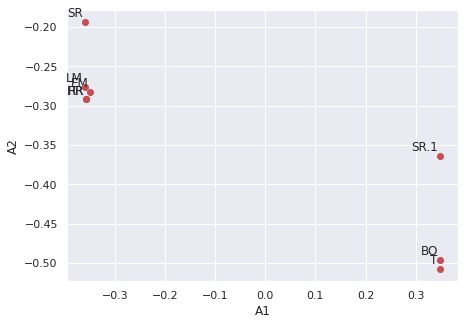

In [23]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


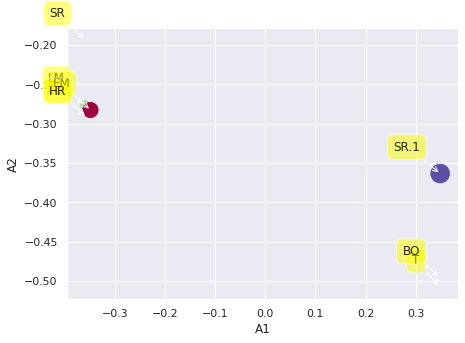

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

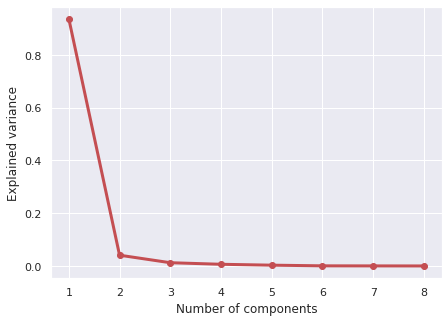

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

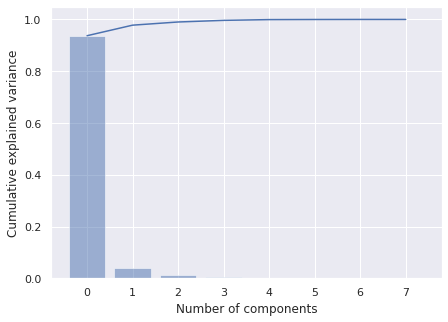

In [26]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [27]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (93.7%)',
 '1': 'PC 2 (4.1%)',
 '2': 'PC 3 (1.2%)',
 '3': 'PC 4 (0.6%)',
 '4': 'PC 5 (0.3%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)'}

**Biplot**

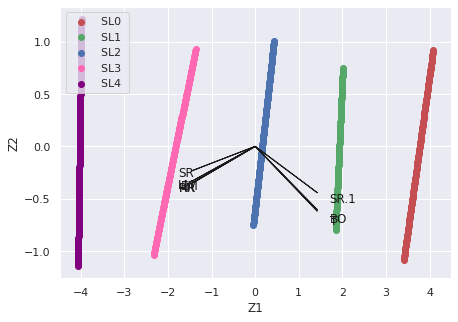

In [28]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx0,0], Z[idx0,1], c='r', label='SL0 ')
plt.scatter(Z[idx1,0], Z[idx1,1], c='g', label='SL1 ')
plt.scatter(Z[idx2,0], Z[idx2,1], c='b', label='SL2 ')
plt.scatter(Z[idx3,0], Z[idx3,1], c='hotpink', label='SL3 ')
plt.scatter(Z[idx4,0], Z[idx4,1], c='purple', label='SL4 ')

plt.legend(loc='upper left')

# **Using PCA Library**

In [29]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e075a56a248d954b3457c5e7bfc47a21429e2b71135b58b44f4ceb7e45c49d9f
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9dfd9eada369ff0a2de0094dd7dba9719dede681c2c054a0da6153a9bd8d7fbe
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [31]:
out['PC']

PC1       PC2
0   -2.250047 -0.878675
1   -2.111753 -0.596370
2    1.844494 -0.801057
3   -1.735288  0.172126
4    3.661345 -0.330122
..        ...       ...
625  0.203803  0.160748
626  3.618319 -0.458267
627 -4.010066  0.330290
628  1.867121 -0.590271
629  0.101487 -0.219588

[630 rows x 2 columns]

**Scatter Plot**

[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc556236b20>)

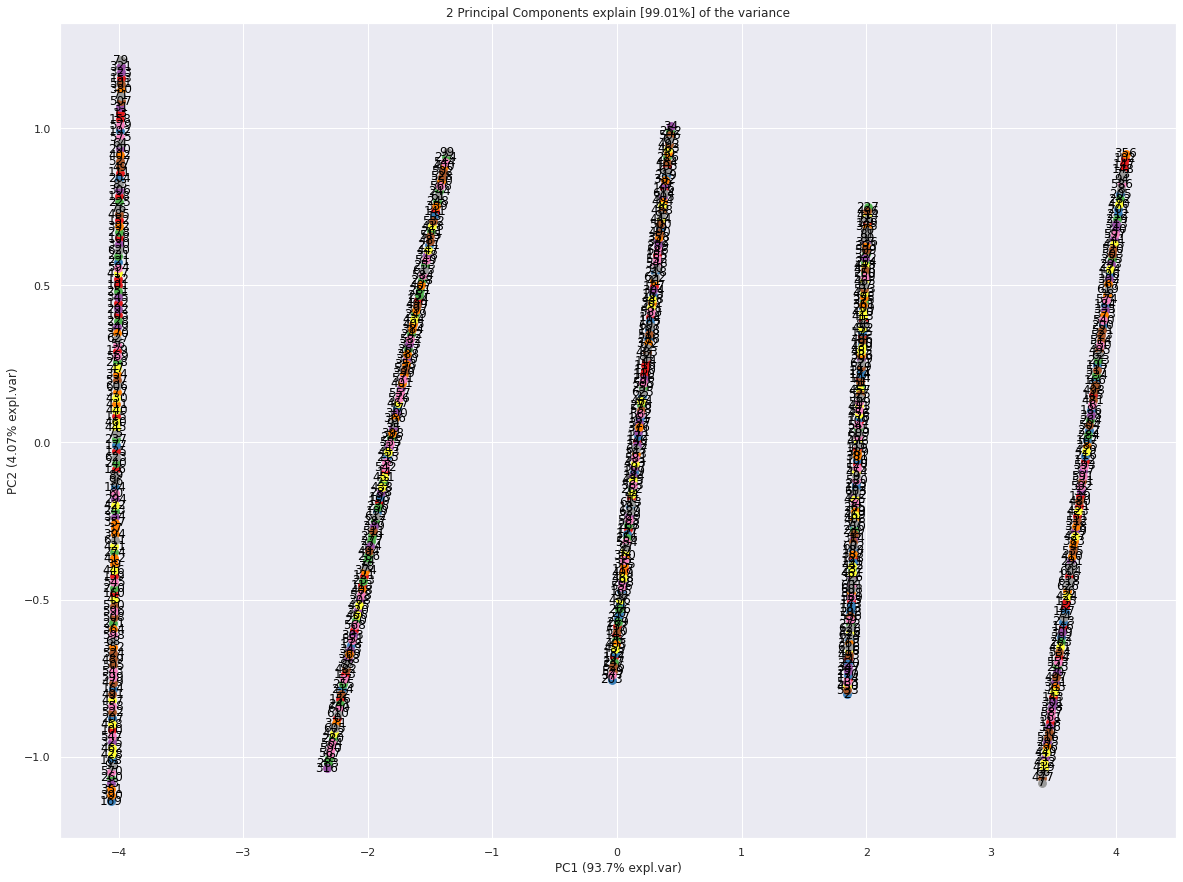

In [32]:
model.scatter(label=True, legend=False)

In [33]:
A = out['loadings'].T

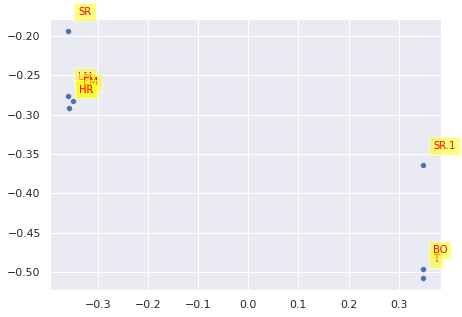

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

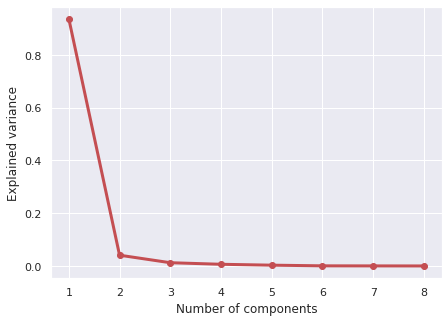

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

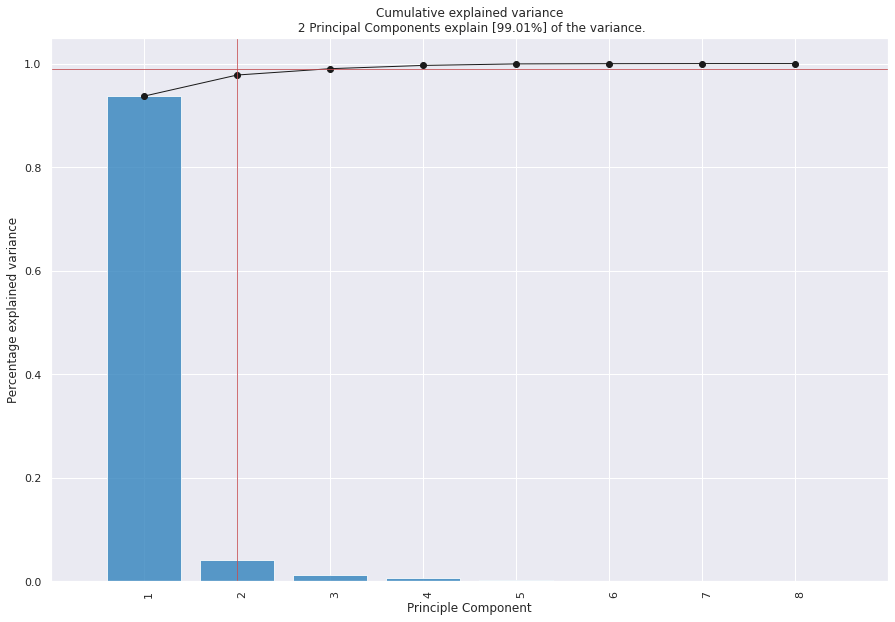

<Figure size 504x360 with 0 Axes>

In [36]:
model.plot();

**BIPLOT**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].


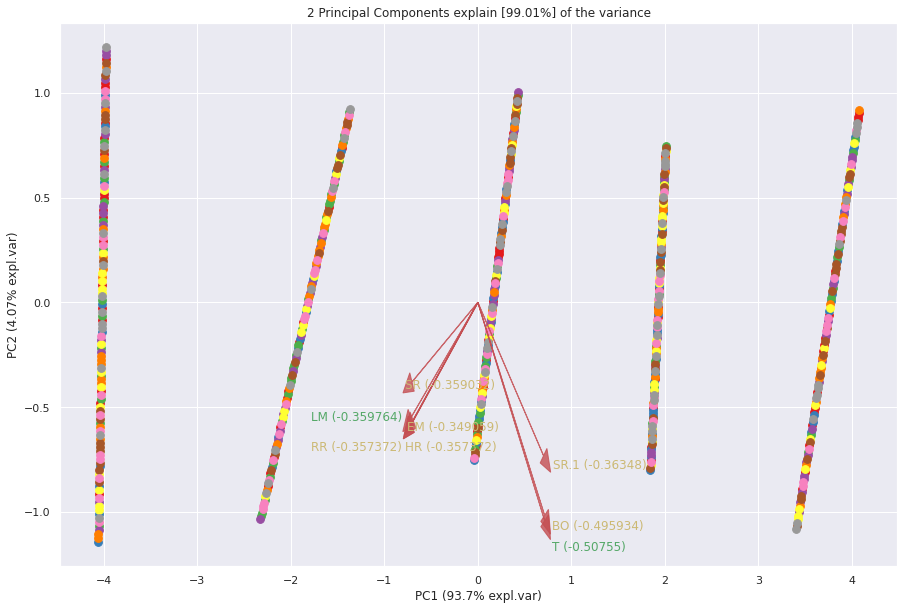

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5569e2d00>)

In [37]:
model.biplot(label=False, legend=False)


# **Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.


In [39]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


When machine learning algorithms are used to make predictions on data that was not used to train the model, their performance is estimated using the train-test split technique. To evaluate prediction performance realistically, you must divide your dataset into training and test dataset. 

In [40]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (567, 9)
Unseen Data For Predictions: (63, 9)


**Setting up the Environment in PyCaret**

The setup() function sets the transformation pipeline and configure the pycaret environment, processing data for modelling and deployment.
Before using any other pycaret module, setup() must be used.
A pandas dataframe and the name of the target column are required inputs.
The optional additional parameters are used to alter the pre-processing pipeline.

The data types in all features are automatically determined by PyCaret's inference method when setup() is used based on specific properties.
It should be possible to precisely deduce the data type, but this is not always the case.In order to take this into account, PyCaret shows a table with the features and their inferred data types after setup() has been called.
Enter can be hit to continue or quit can be typed to end the expression if all the data types have been successfully detected.
PyCaret automatically completes a few pre-processing operations that are essential to any machine learning experiment, thus it is crucial that the data types are accurate.Since these processes are carried out differently for each type of data, it is crucial for them to configured precisely. 

In [41]:
from pycaret.classification import *
clf = setup(data=data, target='SL', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target                SL
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (567, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (396, 6)
12                    Transformed Test Set          (171, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              377d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='SL',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste



Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:



*   **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

*   **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

*   **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

*   **Original Data** : Displays the original shape of the dataset. In this experiment (567, 9) means 567 samples and 9 features including the class column.

*   **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

*   **Numeric Features** : The number of features inferred as numeric. In this dataset, 8 out of 8 features are inferred as numeric.

*   **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

*   **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (567, 9) is transformed into (396, 6) for the transformed train set.

*   **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are  171 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Observe how several essential modelling activities, such missing value imputation and category encoding, are performed automatically.
The majority of the setup() arguments are optional and are used to vary the pre-processing pipeline. 

**Comparing All Models**


In [43]:
best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    0.9975  1.0000  0.9975  0.9978   
lightgbm  Light Gradient Boosting Machine    0.9975  1.0000  0.9975  0.9978   
dt               Decision Tree Classifier    0.9899  0.9937  0.9903  0.9910   
gbc          Gradient Boosting Classifier    0.9898  1.0000  0.9899  0.9910   
ridge                    Ridge Classifier    0.8964  0.0000  0.8974  0.9228   
svm                   SVM - Linear Kernel    0.7501  0.0000  0.7449  0.6924   
ada                  Ada Boost Classifier    0.6086  0.8605  0.6003  0.5004   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   
qda       Quadratic Discriminant Analysis    0.1996  0.0000  0.2000  0.0399   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.457  
knn       1.0000  1.0000  1.0000     0.021  
nb        1.0000  1.0000  1.0000     0.015  
lda       1.0000  1.0000  1.0000     0.017  
et        1.0000  1.0000  1.0000     0.167  
rf        0.9975  0.9969  0.9970     0.209  
lightgbm  0.9975  0.9969  0.9970     0.154  
dt        0.9899  0.9873  0.9876     0.015  
gbc       0.9898  0.9872  0.9876     0.438  
ridge     0.8975  0.8706  0.8777     0.014  
svm       0.6931  0.6871  0.7180     0.019  
ada       0.5150  0.5113  0.6049     0.105  
dummy     0.0777  0.0000  0.0000     0.014  
qda       0.0665  0.0000  0.0000     0.017

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................




**Create a Model**

The most detailed PyCaret function, create model, frequently serves as the basis for all other functionalities.As implied by the function's name, cross validation is used to train and assess a model, and the fold parameter can be used to control this.A score grid that displays Accuracy, Recall, Precision, F1, Kappa, and MCC by fold is printed in the output.


The choices have merely been made for illustration and are  the best or most appropriate for this project.

1. Logistic Regression ('lr')
2. K Neighbors Classifier ('knn')
3. Decision Tree Classifier ('dt')

In [44]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create Logistic Regression Model**

In [45]:
lr = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [47]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [49]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [50]:
knn = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [51]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [52]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Decision Tree Classifier**

In [53]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9750  0.9844  0.9778  0.9778  0.9750  0.9687  0.9695
4       0.9750  0.9844  0.9750  0.9778  0.9749  0.9688  0.9695
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9744  0.9839  0.9750  0.9772  0.9743  0.9679  0.9687
7       0.9744  0.9844  0.9750  0.9776  0.9744  0.9680  0.9688
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9899  0.9937  0.9903  0.9910  0.9899  0.9873  0.9876
SD      0.0124  0.0077  0.0119  0.0110  0.0124  0.0155  0.0151

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


**Tune Decision Tree Model**

In [54]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9744  0.9844  0.9750  0.9776  0.9744  0.9680  0.9688
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9974  0.9984  0.9975  0.9978  0.9974  0.9968  0.9969
SD      0.0077  0.0047  0.0075  0.0067  0.0077  0.0096  0.0094

INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Decision Tree Model**

In [55]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Tune the Best Model**

In [56]:
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [57]:
tuned_best_model

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

In [58]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [60]:
clf_pca = setup(data=data, target='SL', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target                SL
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (567, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (396, 2)
12                    Transformed Test Set          (171, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5834
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='SL',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='SL')),
                ('fix_perfect', Remove_100(t

In [61]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
svm                   SVM - Linear Kernel    0.7291  0.0000  0.7207  0.7147   
ada                  Ada Boost Classifier    0.6085  0.8592  0.6000  0.4799   
ridge                    Ridge Classifier    0.4899  0.0000  0.4754  0.3940   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.056  
knn       1.0000  1.0000  1.0000     0.037  
nb        1.0000  1.0000  1.0000     0.016  
dt        1.0000  1.0000  1.0000     0.015  
rf        1.0000  1.0000  1.0000     0.208  
qda       1.0000  1.0000  1.0000     0.015  
gbc       1.0000  1.0000  1.0000     0.368  
lda       1.0000  1.0000  1.0000     0.015  
et        1.0000  1.0000  1.0000     0.216  
lightgbm  1.0000  1.0000  1.0000     0.150  
svm       0.6887  0.6614  0.6896     0.018  
ada       0.5118  0.5113  0.6053     0.098  
ridge     0.3731  0.3565  0.4078     0.013  
dummy     0.0777  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [62]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the best model**

In [63]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate the best model**

In [64]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…


# **Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.


**install shap library**

In [65]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**install numba library**

In [66]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 9.4 MB/s 
     |████████████████████████████████| 25.3 MB 51.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [67]:
import shap


In [68]:
rf_pca = create_model('rf')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [69]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


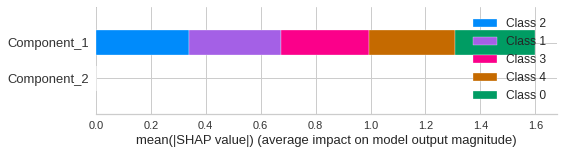

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [70]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize many predictions**

In [71]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
